<a href="https://colab.research.google.com/github/PrathamSoneja/Fraudulent-Transaction-Prediction/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
print(df.shape)
df.head()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


1. Data cleaning including missing values, outliers and multi-collinearity.

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


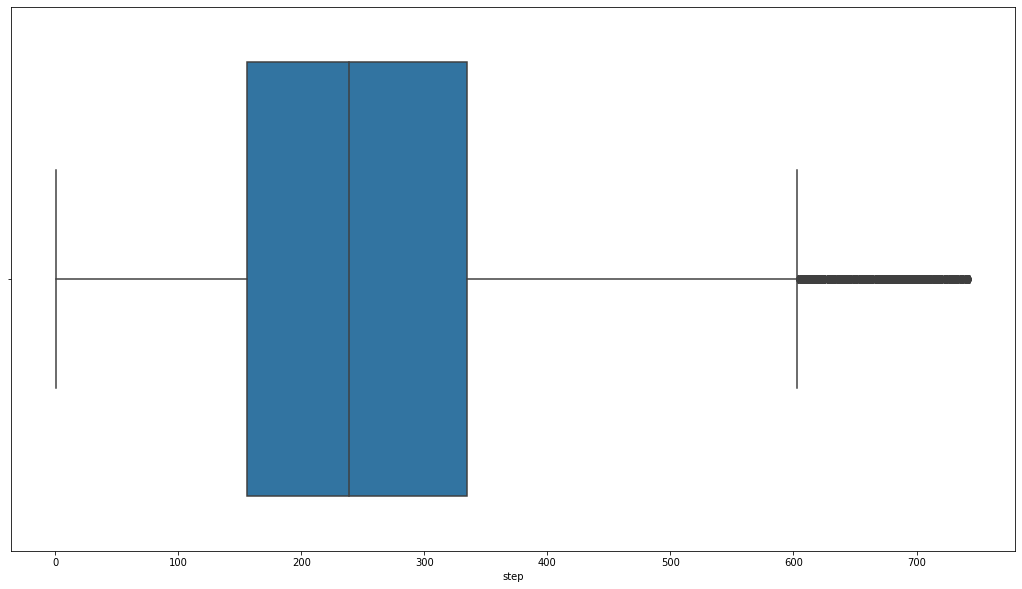

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


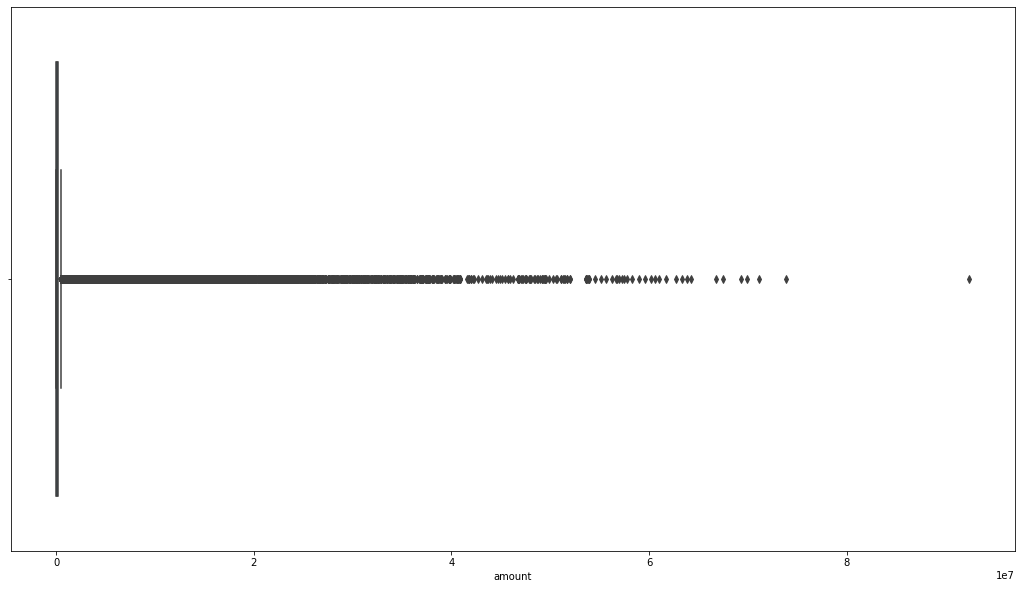

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


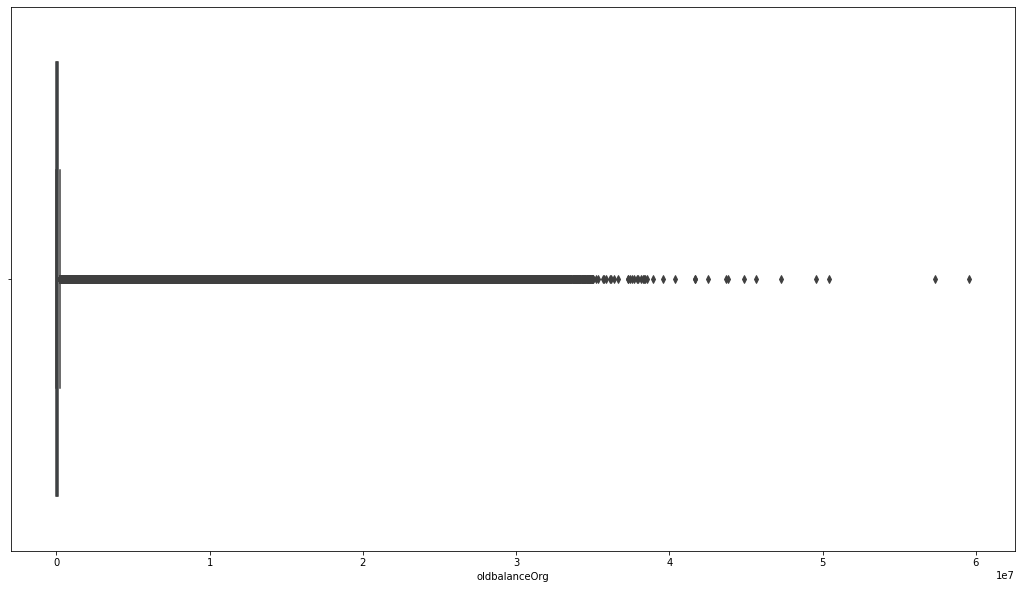

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


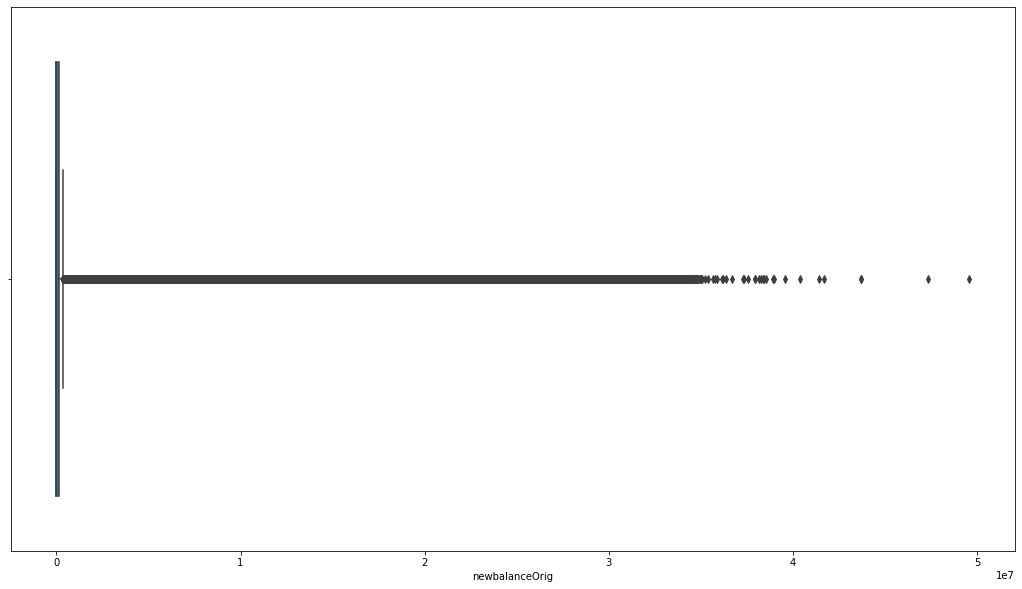

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


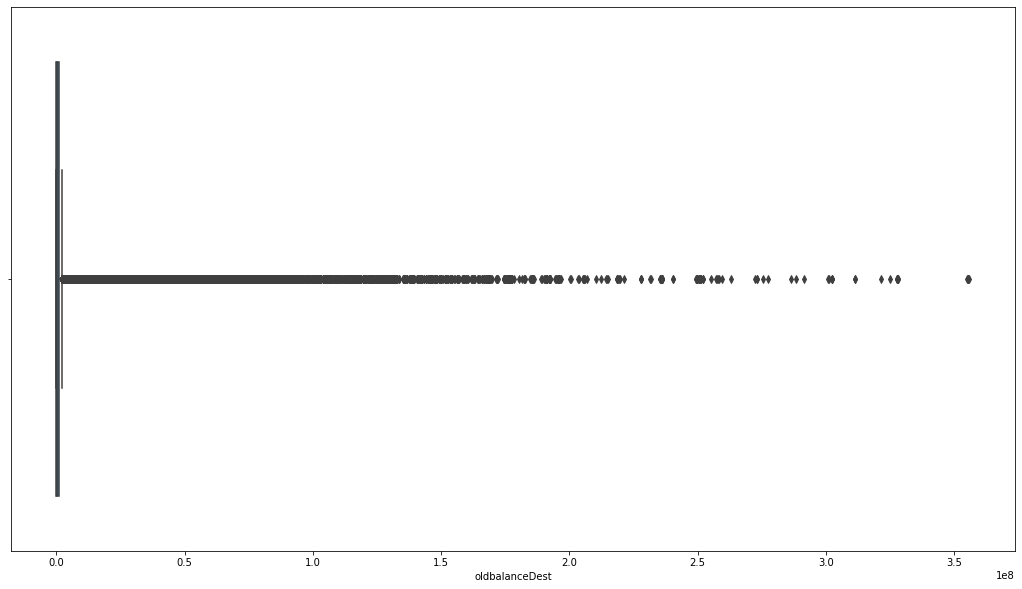

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


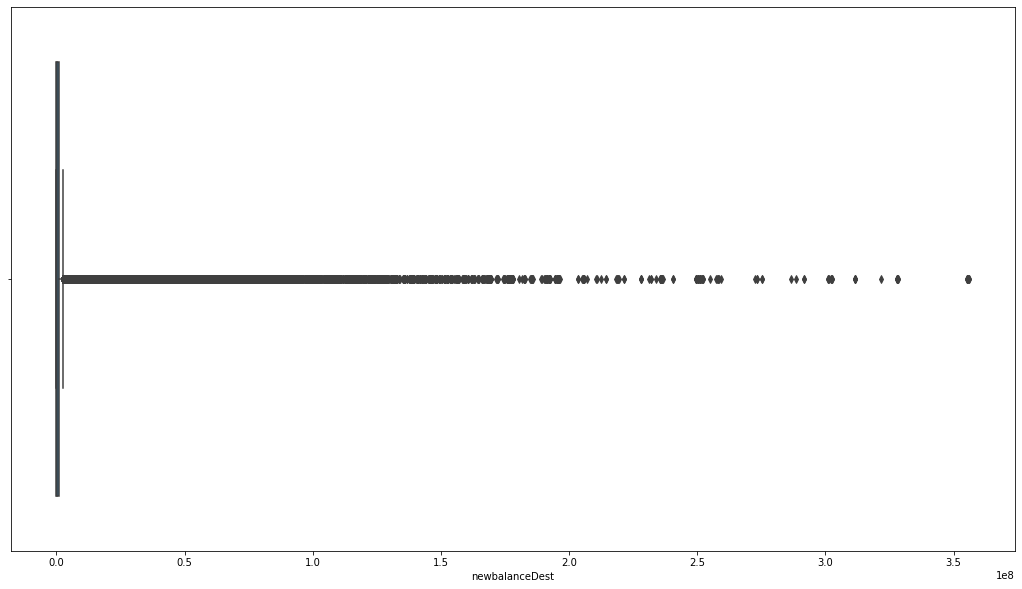

In [ ]:
# No missing values Found
features_with_df = list()

for features in df.columns:
  if df[features].isnull().sum()>0:
    features_with_df.append[features]

features_with_df

# To Check For Continuous Or Discrete Data

n_fname = list()

for features in df.columns:
  if df[features].dtypes != 'O':
    n_fname.append(features)

print(n_fname)

#Continuous features

conti_feat = list()

#visualizing outliers

for features in n_fname:
  if len(df[features].unique())>25:
    conti_feat.append(features)

for features in conti_feat:    
      # Box Plot
      plt.figure(figsize = (18,10))
      sns.boxplot(df[features])
      plt.show()


In [ ]:
#removing outliers

Q1 = 0
Q3 = 0
IQR = 0
conti_feat2= list()

for features in conti_feat:
  Q1 = np.percentile(df[features], 25, interpolation = 'midpoint')

  Q3 = np.percentile(df[features], 75, interpolation = 'midpoint')
  
  IQR = Q3-Q1
    
  upper = (df[features] >= (Q3 + 1.5*IQR))
  lower = (df[features] >= (Q3 + 1.5*IQR))
  
  # Above Upper bound
  conti_feat2.append(np.where(upper))

  # Below Lower bound
  conti_feat2.append(np.where(lower))


In [ ]:
l = []
for i in range(1):
  k = (conti_feat2[i][0].tolist())
  l.append(k)

l = l[0]

In [ ]:
uni_l = list(set(l))
len(uni_l)

102688

In [ ]:
df.drop(l, axis = 0, inplace = True)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df['type'].unique()
dict_1 = {'PAYMENT':0, 'TRANSFER':1, 'CASH_OUT':2, 'DEBIT':3, 'CASH_IN':4}

In [ ]:
df['type'] = df['type'].map(dict_1)

In [ ]:
#removing id-like features 
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace=True)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
#detecting multi collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
    
X = df.copy()

# VIF dataframe
vif_d = pd.DataFrame()
vif_d["feature"] = X.columns
  
# calculating VIF for each feature
vif_d["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_d)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


          feature         VIF
0            step    1.845494
1            type    2.629766
2          amount    4.219051
3   oldbalanceOrg  697.561061
4  newbalanceOrig  709.973209
5  oldbalanceDest   74.126390
6  newbalanceDest   85.821905
7         isFraud    1.179424
8  isFlaggedFraud    1.001540


In [ ]:
#dealing with multi collinearity

df['amount_deducted'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['amount_recieved'] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], axis = 1, inplace = True)

In [ ]:
df.head()

,step,type,amount,isFraud,amount_deducted,amount_recieved
0,1,0,9839.64,0,9839.64,0.0
1,1,0,1864.28,0,1864.28,0.0
2,1,1,181.00,1,181.00,0.0
3,1,2,181.00,1,181.00,-21182.0
4,1,0,11668.14,0,11668.14,0.0


In [ ]:
#from sklearn.model_select import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
X = df.copy()
X.drop(['isFraud'], axis = 1, inplace = True)
y = df['isFraud']

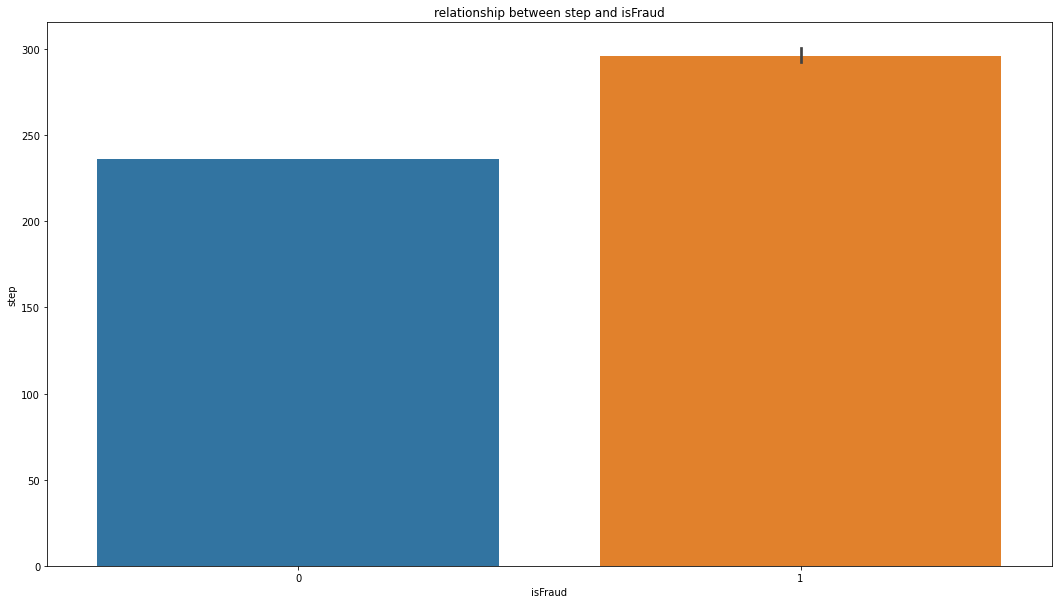

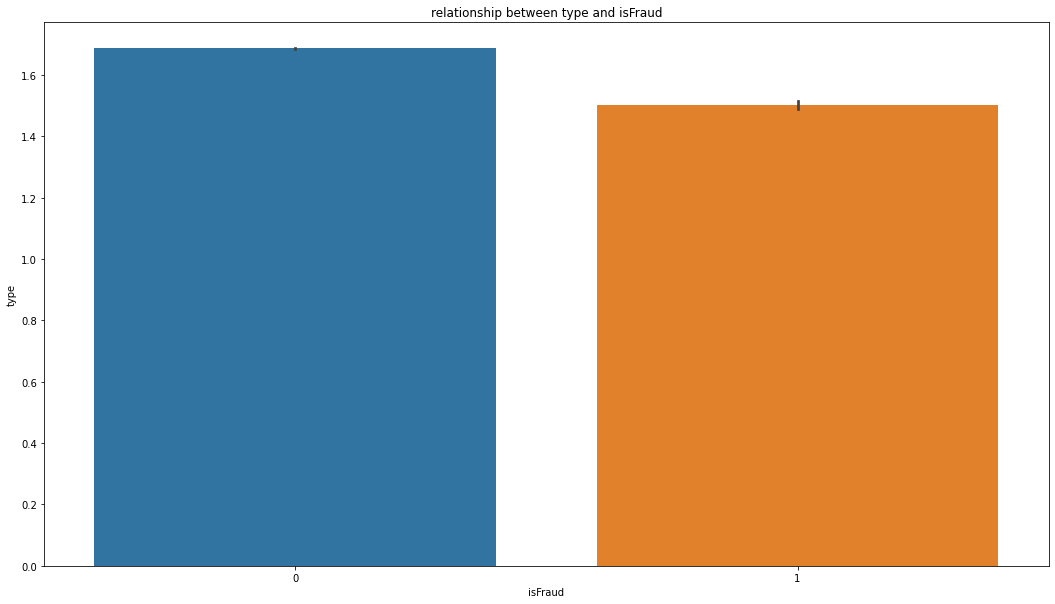

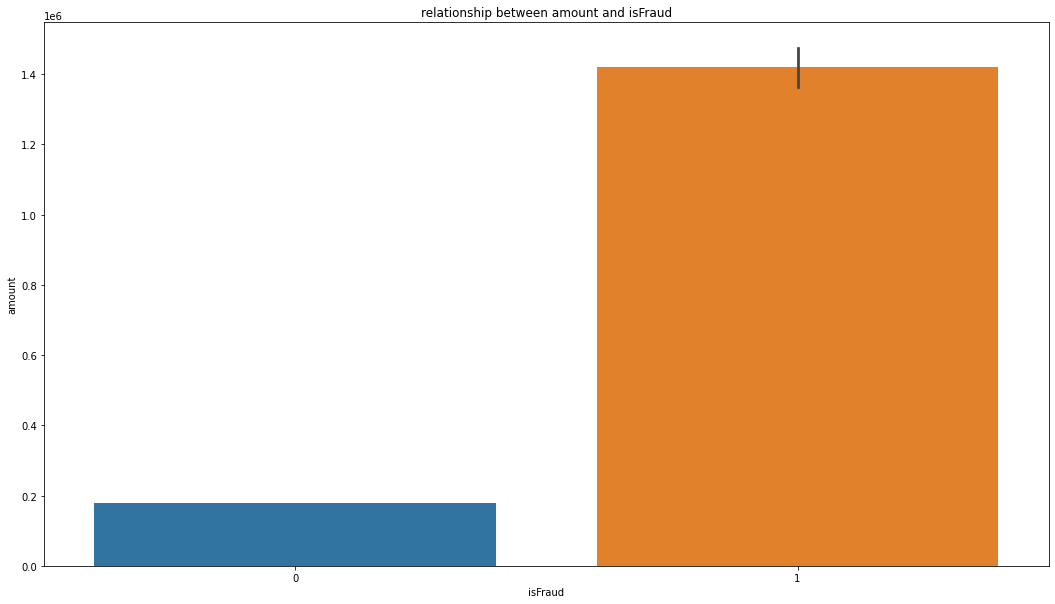

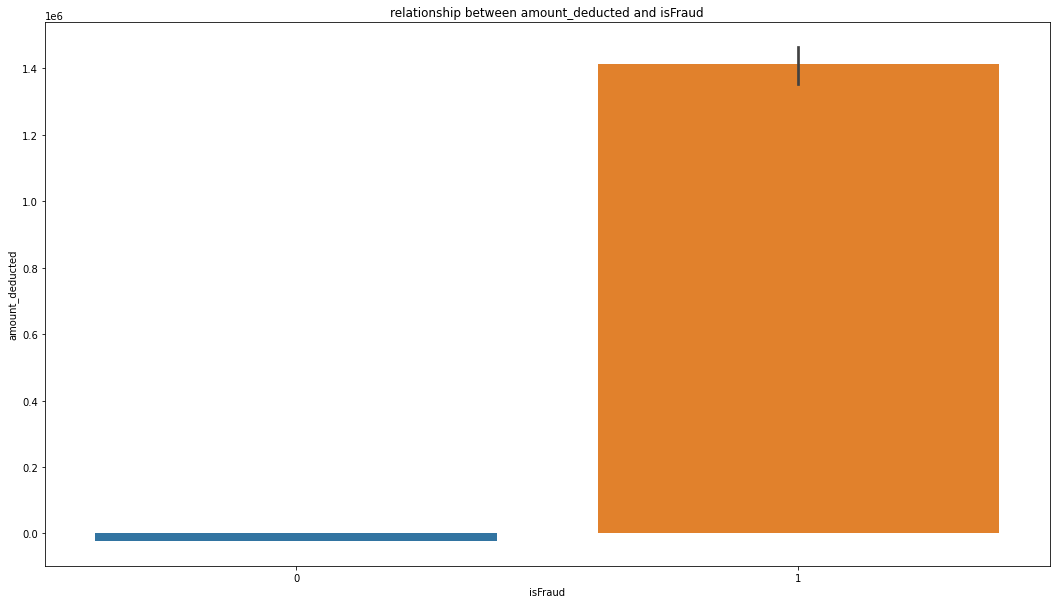

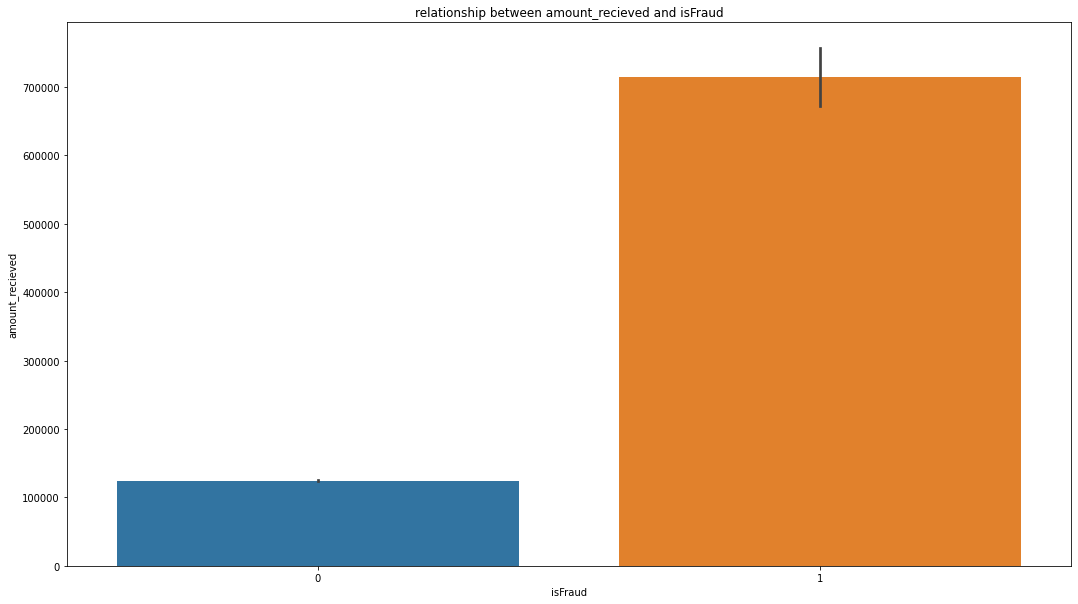

In [ ]:
for feature in X.columns:
  plt.figure(figsize = (18,10))
  sns.barplot(data = df, x = 'isFraud', y = feature)
  plt.title(f'relationship between {feature} and isFraud')
  plt.xlabel('isFraud')
  plt.ylabel(feature)
  plt.show()

In [ ]:
X.drop(['step','type'], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
classifier = LogisticRegression()
scores = cross_val_score(classifier, X, y, cv = 5)
print('cross validation scores:',scores)
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

cross validation scores: [0.99851995 0.99876756 0.99884903 0.99940255 0.99939137]
0.9990 accuracy with a standard deviation of 0.0004


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

2. Describe your fraud detection model in elaboration.

      For the given problem, I have used a logistic regression model. A logistic regression model is a probability based model. This model can take any real-value and map it into a value between 0 and 1. 
      
      let π(x) represent the probability of an event that depends on p covariates or independent variables. Then, using an inv.logit formulation
for modeling the probability, we have:

        π(x) = e^(β0+β1X1+β2X2+...+βpXp)/1 + e^(β0+β1X1+β2X2+...+βpXp)

      To obtain the corresponding logit function from this, we calculate (letting X represent the whole set of covariates X1, X2, . . . , Xp):
      
        logit[π(X)] = β0 + β1X1 + β2X2 + . . . + βpXp
      
      which shows that logistic regression is really just a standard linear regression model, once we transform the dichotomous outcome by the logit transform. This transform changes the range of π(X) from 0 to 1 to −∞ to +∞, as usual for linear regression.
      This model is helpful for binary classification, where output values are either 0 or 1. The logistic regression model takes independent variables and applies the above formulae to generate the probability of fraud.

3. How did you select variables to be included in the model?
  
  I selected the features by plotting the relationship between independent variables and the dependent variable using barplot and observing their individual effect on the outcome.

4. Demonstrate the performance of the model by using best set of tools.
  
  I have used two evalution matrix:
  1. Cross validation scores of 5 cross validation sets:
      mean of Cross_val_score = 0.9990
      standard deviation = 0.0004
  2. Confusion matrix:

      [[1875912, 119]

       [1068, 881]]

       size of test set = 1877980
       total correct predictions = 1876793
       total incorrect preditions = 1187
       Accuracy = 99.9367%
       error = 0.0632%

5. What are the key factors that predict fraudulent customer?

  The key factors that predict fraudulent customers are:
   1. amount -> amount of the transaction in local currency
   2. amount_deducted -> difference between oldbalanceOrg and newbalanceOrig
   3. amount_recieved -> difference between newbalanceDest and oldbalanceDest

6. Do these factors make sense? If yes, How? If not, How not?
  
  These factors do make sense, because maximum number of frauds that have occured have really high amounts whereas frauds involving low amounts are less.

7. What kind of prevention should be adopted while company update its infrastructure?

  Prevention would be to introduce an authorization system, where the company set a transaction limit while opening the account and whenever that limit is crossed, an authentication code is required to process the transaction. The user will recieve this code via SMS or E-mail. In case someone tries to get access to bypass this system, the user will be sent an alert and their account will be freezed for the time being. In order to reactivate their account, they must visit the company's office personally.

8. Assuming these actions have been implemented, how would you determine if they work?

  In order to ensure efficient working of this system, one can introduce beta testing among company employees. The employees can be provided with dummy money that works in the company cafeteria and then the company can use a bug-bounty hunting platform like bug-base, that tries to find flaws in their system. This will help the company to know whether the system has been successfully implemented or not. And in case of any flaws found, they can correct it before deploying it for the consumers.